In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load CSV files
df_header = pd.read_csv('/content/drive/MyDrive/claims-analysis/STONYBRK_20240531_HEADER.csv')
df_line = pd.read_csv('/content/drive/MyDrive/claims-analysis/STONYBRK_20240531_LINE.csv')
df_code = pd.read_csv('/content/drive/MyDrive/claims-analysis/STONYBRK_20240531_CODE.csv')

In [6]:
# Displaying number of rows and columns using shape
print("df_header shape:", df_header.shape)
print("df_code shape:", df_code.shape)
print("df_line shape:", df_line.shape)

df_header shape: (388, 43)
df_code shape: (1536, 9)
df_line shape: (520, 28)


In [7]:
# Display first 5 rows
print("df_header - First 5 rows:")
display(df_header.head())

print("df_code - First 5 rows:")
display(df_code.head())

print("df_line - First 5 rows:")
display(df_line.head())

df_header - First 5 rows:


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


df_code - First 5 rows:


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN


df_line - First 5 rows:


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"


In [8]:
# Column names & data types
print("df_header info:")
display(df_header.info())

print("df_code info:")
display(df_code.info())

print("df_line info:")
display(df_line.info())

df_header info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientId                 388 non-null    int64  
 1   ProspectiveClaimId       388 non-null    int64  
 2   ClaimType                388 non-null    object 
 3   BillingProviderNPI       388 non-null    int64  
 4   BillingProvFirstName     388 non-null    object 
 5   BillingProvLastName      0 non-null      float64
 6   AttendingProviderNPI     2 non-null      float64
 7   AttendingProvFirstName   2 non-null      object 
 8   AttendingProvLastName    2 non-null      object 
 9   RenderingProviderNPI     388 non-null    int64  
 10  RenderingProvFirstName   388 non-null    object 
 11  RenderingProvLastName    388 non-null    object 
 12  ReferringProviderNPI     87 non-null     float64
 13  ReferringProvFirstName   87 non-null     object 
 14  ReferringP

None

df_code info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClientId            1536 non-null   int64  
 1   ProspectiveClaimId  1536 non-null   int64  
 2   CodeQualifier       1536 non-null   object 
 3   CodePos             1536 non-null   int64  
 4   CodeValue           1536 non-null   object 
 5   CodeFromDate        0 non-null      float64
 6   CodeToDate          0 non-null      float64
 7   CodeAmnt            0 non-null      float64
 8   POAInd              0 non-null      float64
dtypes: float64(4), int64(3), object(2)
memory usage: 108.1+ KB


None

df_line info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ClientId             520 non-null    int64  
 1   ProspectiveClaimId   520 non-null    int64  
 2   LinePos              520 non-null    int64  
 3   RevCode              0 non-null      float64
 4   HCPCS                520 non-null    object 
 5   Modifier1            247 non-null    object 
 6   Modifier2            38 non-null     object 
 7   Modifier3            0 non-null      float64
 8   Modifier4            0 non-null      float64
 9   DxMapDelim           520 non-null    object 
 10  DxMap1               520 non-null    int64  
 11  DxMap2               340 non-null    float64
 12  DxMap3               232 non-null    float64
 13  DxMap4               167 non-null    float64
 14  ServiceDate          520 non-null    object 
 15  ServiceThruDate      520 n

None

In [9]:
# Missing value count
print("df_header missing values:")
display(df_header.isnull().sum())

print("df_code missing values:")
display(df_code.isnull().sum())

print("df_line missing values:")
display(df_line.isnull().sum())

df_header missing values:


,0
ClientId,0
ProspectiveClaimId,0
ClaimType,0
BillingProviderNPI,0
BillingProvFirstName,0
BillingProvLastName,388
AttendingProviderNPI,386
AttendingProvFirstName,386
AttendingProvLastName,386
RenderingProviderNPI,0


df_code missing values:


,0
ClientId,0
ProspectiveClaimId,0
CodeQualifier,0
CodePos,0
CodeValue,0
CodeFromDate,1536
CodeToDate,1536
CodeAmnt,1536
POAInd,1536


df_line missing values:


,0
ClientId,0
ProspectiveClaimId,0
LinePos,0
RevCode,520
HCPCS,0
Modifier1,273
Modifier2,482
Modifier3,520
Modifier4,520
DxMapDelim,0


In [10]:
# Descriptive statistics for numeric columns
print("df_line numeric summary:")
display(df_line.describe())

print("df_code numeric summary:")
display(df_code.describe())

print("df_header numeric summary:")
display(df_header.describe())

df_line numeric summary:


,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


df_code numeric summary:


,ClientId,ProspectiveClaimId,CodePos,CodeFromDate,CodeToDate,CodeAmnt,POAInd
count,1536.0,1.536000e+03,1536.000000,0.0,0.0,0.0,0.0
mean,49.0,3.655962e+07,3.666016,NaN,NaN,NaN,NaN
std,0.0,4.706310e+05,2.735657,NaN,NaN,NaN,NaN
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,NaN
25%,49.0,3.646555e+07,1.000000,NaN,NaN,NaN,NaN
50%,49.0,3.675250e+07,3.000000,NaN,NaN,NaN,NaN
75%,49.0,3.686023e+07,5.000000,NaN,NaN,NaN,NaN
max,49.0,3.700149e+07,12.000000,NaN,NaN,NaN,NaN


df_header numeric summary:


,ClientId,ProspectiveClaimId,BillingProviderNPI,BillingProvLastName,AttendingProviderNPI,RenderingProviderNPI,ReferringProviderNPI,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,...,AdmitType,DischargeStatus,AdmitDx,CoderId,PlaceOfService,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
count,388.0,3.880000e+02,3.880000e+02,0.0,2.000000e+00,3.880000e+02,8.700000e+01,0.0,0.0,0.0,...,0.0,0.0,0.0,388.0,388.000000,388.000000,388.0,0.0,0.0,0.0
mean,49.0,3.670543e+07,1.462851e+09,NaN,1.472878e+09,1.565732e+09,1.538206e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,17.664948,316.175258,0.0,NaN,NaN,NaN
std,0.0,3.562317e+05,3.247005e+08,NaN,6.069869e+08,2.863497e+08,2.676761e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,4.798913,0.380678,0.0,NaN,NaN,NaN
min,49.0,3.521699e+07,1.063469e+09,NaN,1.043673e+09,1.003467e+09,1.003264e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
25%,49.0,3.669166e+07,1.154376e+09,NaN,1.258275e+09,1.295152e+09,1.391558e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
50%,49.0,3.683352e+07,1.437106e+09,NaN,1.472878e+09,1.467003e+09,1.518953e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
75%,49.0,3.688171e+07,1.821036e+09,NaN,1.687480e+09,1.902082e+09,1.780521e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
max,49.0,3.700149e+07,1.982659e+09,NaN,1.902082e+09,1.992124e+09,1.992068e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,23.000000,317.000000,0.0,NaN,NaN,NaN


In [11]:
# Unique Claims
unique_header = df_header['ProspectiveClaimId'].nunique()
unique_line   = df_line['ProspectiveClaimId'].nunique()
unique_code   = df_code['ProspectiveClaimId'].nunique()

print("Unique Claims in HEADER:", unique_header)
print("Unique Claims in LINE:", unique_line)
print("Unique Claims in CODE:", unique_code)

Unique Claims in HEADER: 388
Unique Claims in LINE: 388
Unique Claims in CODE: 388


In [12]:
# Date range / convert dates to datetime
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])

min_date = df_header['ServiceFromDate'].min()
max_date = df_header['ServiceToDate'].max()

print(f"Service Date Range: {min_date.date()} to {max_date.date()}")

Service Date Range: 2023-09-25 to 2024-05-29


/tmp/ipython-input-3134833552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
/tmp/ipython-input-3134833552.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])


In [13]:
# Average service lines per claim
avg_lines = df_line.groupby('ProspectiveClaimId').size().mean()

print(f"Average Service Lines per Claim: {avg_lines:.2f}")

Average Service Lines per Claim: 1.34


In [14]:
# Average diagnosis codes per claim
avg_dx = df_code.groupby('ProspectiveClaimId').size().mean()

print(f"Average Diagnosis Codes per Claim: {avg_dx:.2f}")

Average Diagnosis Codes per Claim: 3.96


In [15]:
# Q1 Provider Analysis
top_providers = df_header['BillingProviderNPI'].value_counts().head(5)

print("Top 5 Billing Providers:")
display(top_providers)


Top 5 Billing Providers:


,count
BillingProviderNPI,
1821035601,152
1063468536,81
1154376309,69
1538114723,40
1437105905,36


In [16]:
top_providers = (
    df_header.groupby(['BillingProvFirstName', 'BillingProviderNPI'])['ProspectiveClaimId']
    .nunique()
    .reset_index(name='ClaimCount')
    .sort_values(by='ClaimCount', ascending=False)
  )
print(top_providers)

                  BillingProvFirstName  BillingProviderNPI  ClaimCount
3                        SB INTERNISTS          1821035601         152
5               SB SURGICAL ASSOCIATES          1063468536          81
0     NEW YORK SPINE AND BRAIN SURGERY          1154376309          69
6  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          1538114723          40
4            SB PSYCHIATRIC ASSOCIATES          1437105905          36
1                SB CHILDREN'S SERVICE          1083660575           9
2    SB FAMILY AND PREVENTIVE MEDICINE          1982659470           1


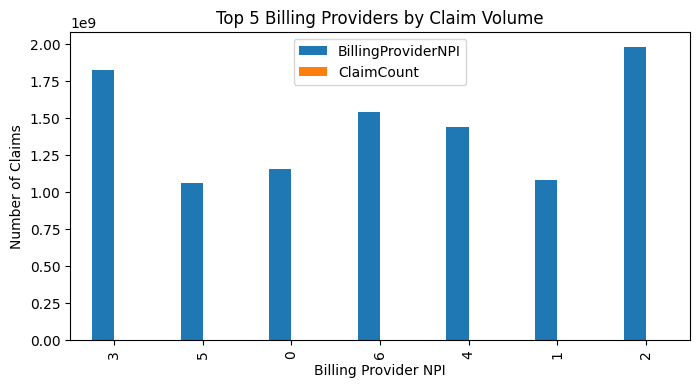

In [17]:
# Visualization
top_providers.plot(kind='bar', figsize=(8,4))
plt.title("Top 5 Billing Providers by Claim Volume")
plt.xlabel("Billing Provider NPI")
plt.ylabel("Number of Claims")
plt.show()

In [19]:
# Q2 Payer Mix Analysis
payer_counts = df_header['PrimaryPayerName'].value_counts().head(5)
payer_percent = (payer_counts / df_header.shape[0]) * 100

print("Top 5 Payers by Claim Count:")
display(payer_counts)

print("\nPercentage of Total Claims:")
display(payer_percent)

Top 5 Payers by Claim Count:


,count
PrimaryPayerName,
MEDICARE,242
HEALTHFIRST FFS,46
FIDELIS/BETTER HEALTH PLAN,26
HIP MEDICAID,17
HEALTHFIRST CAPITATED,10



Percentage of Total Claims:


,count
PrimaryPayerName,
MEDICARE,62.371134
HEALTHFIRST FFS,11.855670
FIDELIS/BETTER HEALTH PLAN,6.701031
HIP MEDICAID,4.381443
HEALTHFIRST CAPITATED,2.577320


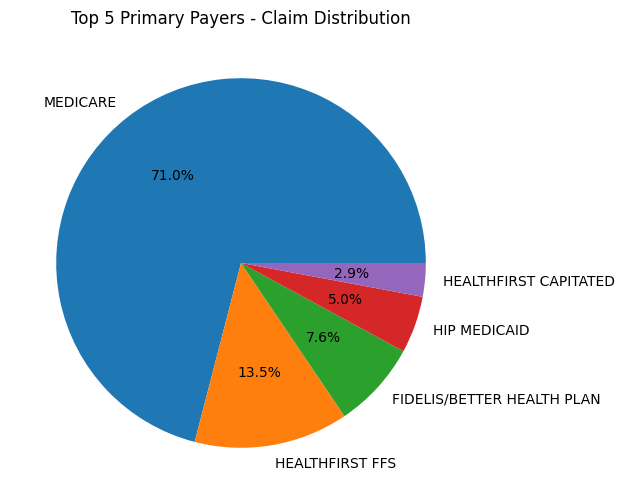

In [20]:
# Visualization (pie chart)
payer_percent.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Primary Payers - Claim Distribution")
plt.ylabel("")
plt.show()